# แบบฝึกหัด การทำ Regression Analysis
การทำนายยอดการขายจากการทำประชาสัมพันธ์ผ่านช่องทางต่างๆ



ทำการเชื่อม Google Drive

In [334]:
# from google.colab import drive

# drive.mount('/content/gdrive')

ระบุ Folder ใน Drive ที่ต้องการใช้

In [335]:
import os
# os.chdir("/content/gdrive/My Drive/Colab Notebooks")
os.chdir("/Users/phutharesuanwachirapisut/Programming/Dataset")


อ่านข้อมูลจากไฟล์ ประกอบด้วยค่าใช้จ่ายในการทำประชาสัมพันธ์ ทาง TV, Radio

In [336]:
# Load libraries
import pandas as pd

dataset= pd.read_csv("advertising.csv")
dataset.head()

,YouTube,Facebook,TikTok,Sales
0,230100,37800,69200,2210000
1,44500,39300,45100,1040000
2,17200,45900,69300,1200000
3,151500,41300,58500,1650000
4,180800,10800,58400,1790000


**ทดลองสร้าง Scatter Plot เพื่อแสดงความสัมพันธ์ระหว่างข้อมูล**
ให้เลือกข้อมูลมา 1 คอลัมน์ที่มีความสัมพันธ์เชิงเส้นกับ ยอดขาย (Sales)
มากที่สุด เพื่อนำข้อมูลนั้นไปใช้เป็น ค่าใช้จ่ายในการประชาสัมพันธ์ผ่านช่องทางที่เลือกมาสร้างโมเดลการทำนายยอดขาย (Sales) เพื่อสำหรับการสร้าง Simple Linear Regression Model ในขั้นตอนต่อไป

In [337]:
import matplotlib.pyplot as plt

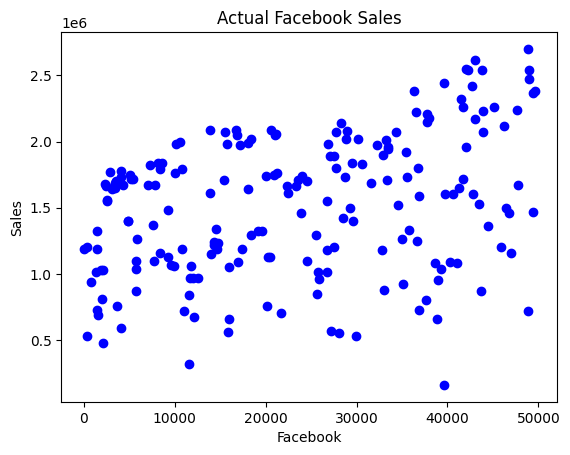

In [338]:
x_values = dataset['Facebook']
y_values = dataset['Sales']
# plot the original values
plt.scatter(x_values, y_values, c='b')
plt.title("Actual Facebook Sales")

plt.xlabel('Facebook')
plt.ylabel('Sales')
plt.show()

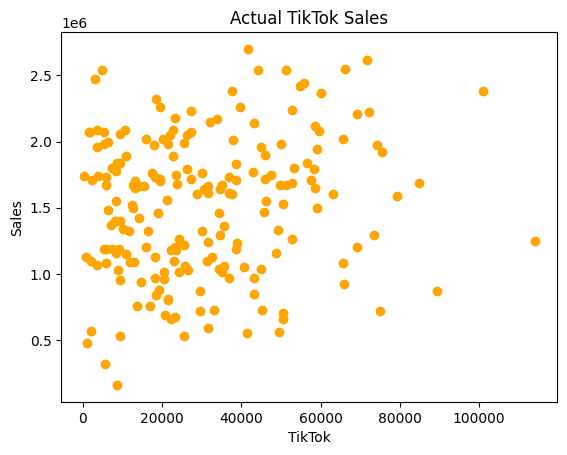

In [339]:
x_values = dataset['TikTok']
y_values = dataset['Sales']
# plot the original values
plt.scatter(x_values, y_values, c='orange')
plt.title("Actual TikTok Sales")
plt.xlabel('TikTok')
plt.ylabel('Sales')
plt.show()

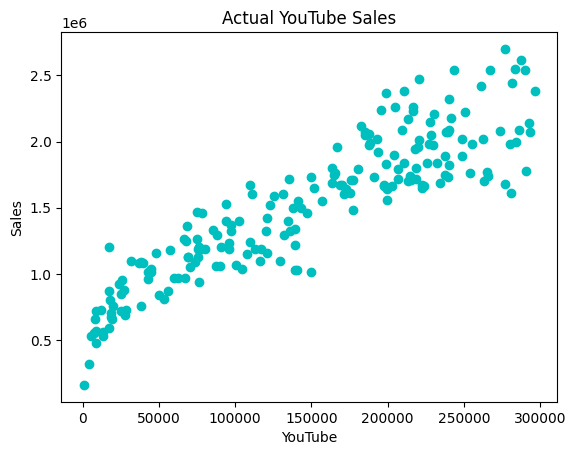

In [340]:
x_values = dataset['YouTube']
y_values = dataset['Sales']
# plot the original values
plt.scatter(x_values, y_values, c='c')
plt.title("Actual YouTube Sales")
plt.xlabel('YouTube')
plt.ylabel('Sales')
plt.show()

แบ่งข้อมูลเป็น Features และ Target value โดย Features จะเรียกว่า Independent variable ในตัวอย่างนี้คือ ประสบการณ์ทำงาน

โดย Features จะเรียกอีกชื่อว่า Independent variable ในตัวอย่างนี้คือ

*   โดย Features จะเรียกอีกชื่อว่า Independent variable ในตัวอย่างนี้คือ ค่าใช้จ่ายในการประชาสัมพันธ์ผ่านช่องทางที่เลือกมาคำนวณ ที่มีผลกับยอดขาย (Sales)
*   ในขณะที่ Target value จะเรียกอีกชื่อว่า Dependent variable ในตัวอย่างนี้คือ ยอดขาย (Sales)

In [341]:
X = dataset['YouTube'].values.reshape(-1, 1)
y = dataset['Sales'].values.reshape(-1, 1)

ทำการแบ่ง Training set และ Testing set

In [342]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

สร้างโมเดล Regression Analysis

In [343]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

แสดงสมการที่ได้จากการสร้างโมเดล

In [344]:
# print the model that was fitted (the regression formula)
print("Sales = ", model.coef_[0], "* YouTube + " , model.intercept_)

Sales =  [5.65681811] * YouTube +  [687384.36798721]


การทำนายผลจากโมเดลที่สร้างขึ้น

In [345]:
y_pred = model.predict(X_test)
print(y_pred)

[[1612274.12927896]
 [1681287.31024384]
 [2344266.39295573]
 [1894549.35306157]
 [1750300.49120873]
 [ 910828.68340631]
 [1467459.58561493]
 [2272424.8029349 ]
 [1457842.99482474]
 [1086755.72668566]
 [1918873.67094264]
 [ 832198.91165124]
 [1832890.03564212]
 [1733330.0368731 ]
 [ 784681.63951148]
 [1923399.12543214]
 [1112211.40818911]
 [2275253.21199084]
 [1780281.62720168]
 [1677893.21937672]
 [ 838987.09338549]
 [1065825.49967172]
 [1350363.45069909]
 [2045586.39664867]
 [1905862.98928533]
 [1945460.71606846]
 [ 731507.54925984]
 [1447095.04041217]
 [1077704.81770666]
 [1308502.99667121]
 [2348226.16563404]
 [1113342.77181148]
 [1343575.26896484]
 [2235655.48520771]
 [2279212.98466915]
 [1624153.4473139 ]
 [1228741.86129375]
 [1783110.03625761]
 [1749734.80939755]
 [2253757.30316571]]


สร้างกราฟแสดงความสัมพันธ์ของข้อมูลคอลัมน์ Sales ซึ่งเป็น Dependent Variable และ  Independent Variable  ในที่นี้คือ ค่าใช้จ่ายในการประชาสัมพันธ์ผ่านช่องทางที่เลือกมาสร้างโมเดลการทำนายยอดขาย (Sales)


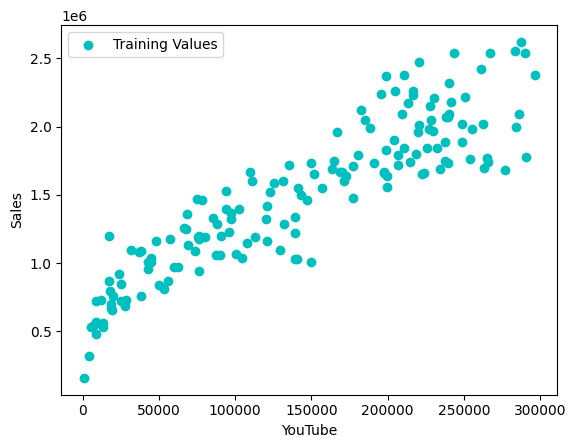

In [346]:
import matplotlib.pyplot as plt
# plot the original values
plt.scatter(X_train,y_train, c='c', label='Training Values')

plt.xlabel('YouTube')
plt.ylabel("Sales")
plt.legend()
plt.show()

คำนวณ Sales : รายได้จากการขาย จาก Linear Regression Model
*   โดยกำหนดค่า x มีค่า = 0 หรือ การไม่จ่ายค่าประชาสัมพันธ์ผ่านช่องทางที่เลือกใช้ในการสร้างโมเดล เพื่อคำนวณยอดขาย (Sales) ในกรณีที่ไม่ได้จ่ายค่าประชาสัมพันธ์ผ่านช่องทางนั้น
*  อีกหนึ่งค่าโดยใช้ค่า x ที่เป็นค่าที่มากที่สุดจากข้อมูลสอน (Training Dataset) ในที่นี้คือ ค่าใช้จ่ายในการประชาสัมพันธ์ที่มากที่สุด สำหรับช่องทางประชาสัมพันธ์ที่เลือกใช้ในการสร้างโมเดลการทำนายยอดขาย

In [347]:
# Calculate the predited values
xfit=[[0],[296400]]
yfit=model.predict(xfit)

print(f"xfit:{xfit}\nyfit:{yfit}")

xfit:[[0], [296400]]
yfit:[[ 687384.36798721]
 [2364065.25634729]]


แสดงกราฟเส้นเพื่อแสดงสมการเส้นตรงที่ได้จากการสร้าง Linear Regression Model โดยกำหนดค่า x มีค่า = 0 เพื่อแสดงจุดตัดแกน y และกำหนดค่า x อีกหนึ่งค่าโดยใช้ค่า x ที่เป็นค่าที่มากที่สุดจากข้อมูลสอน (Training Dataset)

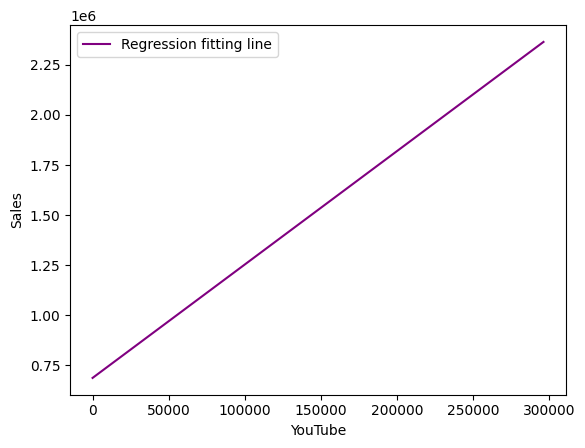

In [348]:
# plot the predicted values
plt.plot(xfit, yfit,c='purple', label='Regression fitting line')
plt.xlabel('YouTube')
plt.ylabel('Sales')
plt.legend()
plt.show()

แสดงข้อมูลจริงใน Training Data set เทียบกับผลการทำนายด้วย Linear Regression Model ที่สร้างขึ้น


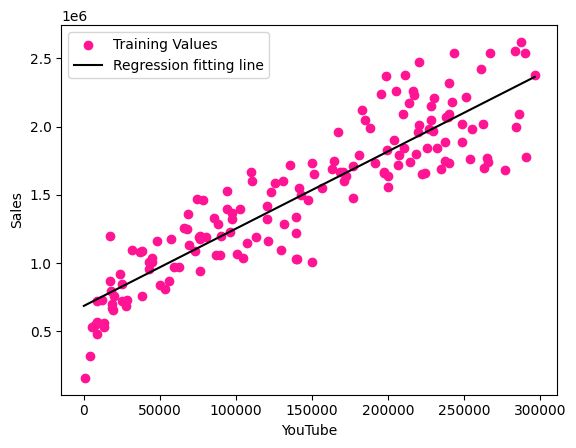

In [349]:
# plot the original training values
plt.scatter(X_train,y_train, c='deeppink', label='Training Values')

# plot the predicted values
plt.plot(xfit,yfit,c='k', label='Regression fitting line')
plt.xlabel('YouTube')
plt.ylabel('Sales')
plt.legend()
plt.show()

แสดงข้อมูลจริงใน Testing Data set เทียบกับผลการทำนายด้วย Linear Regression Model ที่สร้างขึ้น

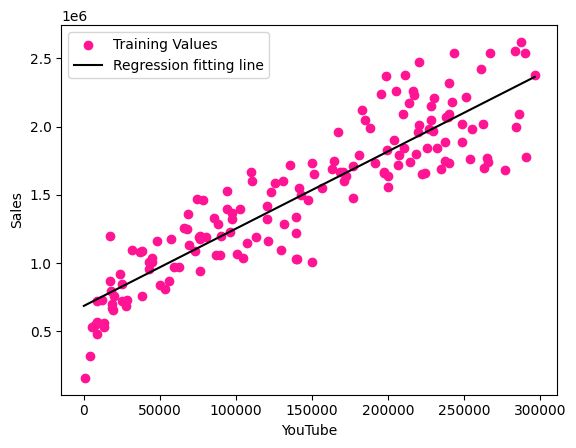

In [350]:
# plot the original training values
plt.scatter(X_train,y_train, c='deeppink', label='Training Values')

# plot the predicted values
plt.plot(xfit,yfit,c='k', label='Regression fitting line')
plt.xlabel('YouTube')
plt.ylabel('Sales')
plt.legend()
plt.show()

ประเมินผลประสิทธิภาพของโมเดล

In [351]:
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.metrics import mean_absolute_error
from math import sqrt


# evaluate using different measures
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("==== The evaluation results ====")
print('MAE: ',mae)
print('MSE: ',mse)
print('RMSE: ',sqrt(mse))
print('R^2: ',r2)

==== The evaluation results ====
MAE:  170682.7700978661
MSE:  45010460051.855286
RMSE:  212156.68750208014
R^2:  0.8025423994215605


ทดสอบการทำงานของโมเดลด้วยการป้อนข้อมูลตัวแปร cost ค่าใช้จ่ายในการประชาสัมพันธ์ผ่านช่องทางประชาสัมพันธ์ที่เลือกใช้ในการสร้างโมเดลการทำนายยอดขาย

In [352]:
cost = 300000
sample = [[cost]]
y_pred = model.predict(sample)
print("ค่าใช้จ่ายการประชาสัมพันธ์ผ่านช่องทาง Youtube=", cost)
print("ทำนายยอดขาย =" ,y_pred)

ค่าใช้จ่ายการประชาสัมพันธ์ผ่านช่องทาง Youtube= 300000
ทำนายยอดขาย = [[2384429.80155005]]


ทดสอบการทำงานของโมเดลด้วยการป้อนข้อมูลผ่านฟอร์ม โดยที่ตัวแปร cost ค่าใช้จ่ายในการประชาสัมพันธ์ผ่านช่องทางประชาสัมพันธ์ที่เลือกใช้ในการสร้างโมเดลการทำนายยอดขาย

In [353]:
cost= 300000 #@param {type:"slider", min:0, max:300000, step:1000}

In [354]:
TestingData = [[cost]]

prediction = model.predict(TestingData)
print("ค่าใช้จ่ายการประชาสัมพันธ์ผ่านช่องทาง  Youtube =", cost)
print("ทำนายยอดขาย =" ,prediction)

ค่าใช้จ่ายการประชาสัมพันธ์ผ่านช่องทาง  Youtube = 300000
ทำนายยอดขาย = [[2384429.80155005]]
